<h1 style="text-align: center;">VGG19</h1>

## Loading the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Loading the CIFAR-10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

170498071/170498071 [==============================] - 6s 0us/step


## Creating the VGG19 model from a scratch

In [ ]:
def create_vgg19_scratch():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(10, activation='softmax')  # Output layer for 10 classes in CIFAR-10
    ])
    return model

## Training the model

In [ ]:
vgg19_scratch = create_vgg19_scratch()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
vgg19_scratch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
scratch_history = vgg19_scratch.fit(
    train_images, train_labels,
    epochs=70,
    validation_data=(test_images, test_labels)
)

Epoch 1/70
1563/1563 [==============================] - 81s 45ms/step - loss: 1.9639 - accuracy: 0.2097 - val_loss: 1.7949 - val_accuracy: 0.2813
Epoch 2/70
1563/1563 [==============================] - 69s 44ms/step - loss: 1.6663 - accuracy: 0.3465 - val_loss: 1.5634 - val_accuracy: 0.3866
Epoch 3/70
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5258 - accuracy: 0.4094 - val_loss: 1.4458 - val_accuracy: 0.4520
Epoch 4/70
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4298 - accuracy: 0.4576 - val_loss: 1.3861 - val_accuracy: 0.4803
Epoch 5/70
1563/1563 [==============================] - 71s 46ms/step - loss: 1.3467 - accuracy: 0.4931 - val_loss: 1.3204 - val_accuracy: 0.5016
Epoch 6/70
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2736 - accuracy: 0.5266 - val_loss: 1.2891 - val_accuracy: 0.5179
Epoch 7/70
1563/1563 [==============================] - 71s 45ms/step - loss: 1.2024 - accuracy: 0.5552 - val_loss: 1.2442 -

## Printing the training and testing accuracy

In [ ]:
train_loss = scratch_history.history['loss']
train_acc = scratch_history.history['accuracy']
val_loss = scratch_history.history['val_loss']
val_acc = scratch_history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"Final Testing Accuracy: {val_acc[-1]*100:.2f}%")

Final Training Accuracy: 98.62%
Final Testing Accuracy: 65.35%


## Plotting the accuracy and loss

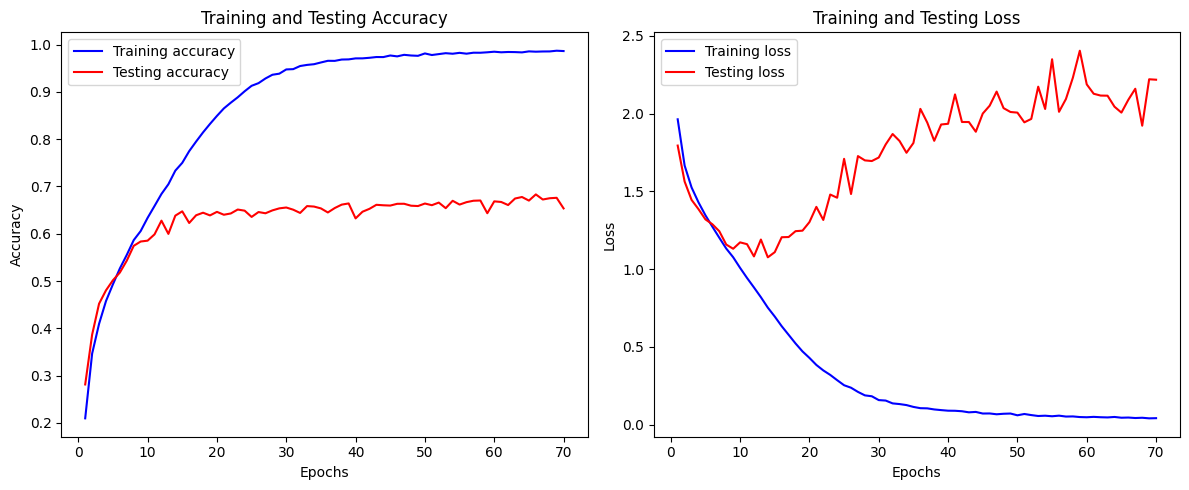

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Testing loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()